In [ ]:
#import lib
import os
import glob
import pyart
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#1 get radar NC files
folpath = r'/Volumes/SeagateH/Project/Jup/MDV*PPIVol.nc'
field_parameter = 'DBZH'
files = sorted(glob.glob(folpath))

In [ ]:
#printing file names
files

In [ ]:
#'''grid the data files'''
# by using pyart.map.grid_from_radars function

def get_grid(radar):
    """ Returns grid object from radar object. """
    grid = pyart.map.grid_from_radars(
        radar, grid_shape=(31, 251, 251),
        grid_limits=((0, 15000), (-125000, 125000), (-125000, 125000)),
        fields=['DBZH'], gridding_algo='map_gates_to_grid',
        h_factor=0., nb=0.6, bsp=1., min_radius=125.)
    return grid

In [ ]:
#251 parts - 501parts 31 vert

In [ ]:
#saving converted data
for filename in files:
    print('saving grid', filename)
    radar = pyart.io.read_cfradial(filename)
    grid = get_grid(radar)
    name = os.path.join(r'/Volumes/Seagate Exp/Project/Jup/', 'grid_' + filename[-29:] )
    pyart.io.write_grid(name, grid)
    del radar, grid

## Plotting Converted data , here you can change the value of parameter, i've used 2 for 1km altitude

In [ ]:
grid = pyart.io.read_grid('/Volumes/Seagate Exp/Project/Jup/grid_MDV-20150805-070428-PPIVol.nc')
#grid.fields['DBZH']['data'] = np.ma.masked_outside(grid.fields['DBZH']['data'],0,55)
fig = plt.figure(figsize=(10,7))
display = pyart.graph.GridMapDisplay(grid)
display.plot_grid('DBZH', 2, vmin=0, vmax=60, mask_outside=True,
              cmap='pyart_NWSRef',colorbar_flag=0)



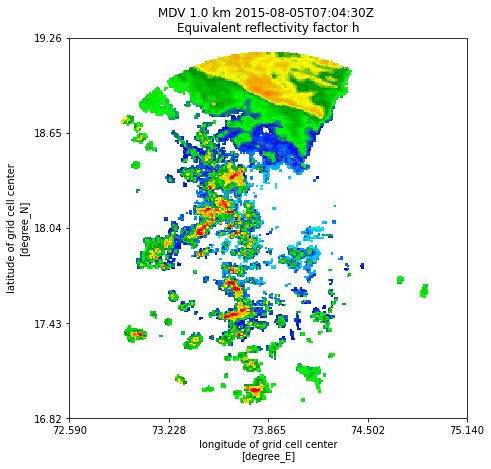

# Example and comparison b/w ppi and cappi

In [ ]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import pyart
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader
import cartopy.io.img_tiles as cimgt  
import cartopy.mpl.geoaxes

## Here I've read two data files, one is volume data file (radar) and other is converted datafile (grid)

In [ ]:
grid = pyart.io.read_grid('/Volumes/SeagateH/Project/Jup/grid_MDV-20150805-070428-PPIVol.nc')
radar = pyart.io.read('/Volumes/SeagateH/Project/Jup/MDV-20150805-070428-PPIVol.nc')

In [ ]:
projection = ccrs.LambertConformal(central_latitude=grid.radar_latitude['data'][0],
                                   central_longitude=grid.radar_longitude['data'][0])

In [ ]:
#grid.fields['DBZH']['data'] = np.ma.masked_outside(grid.fields['DBZH']['data'],0,55)
fig = plt.figure(figsize=[15,5])
ax = plt.subplot(1,2,1,projection=ccrs.PlateCarree())
display = pyart.graph.GridMapDisplay(grid)
display.plot_grid('DBZH', 4, vmin=-10, vmax=60, mask_outside=True,
              cmap='pyart_NWSRef',colorbar_flag=1)
ax = plt.subplot(1,2,2,projection=ccrs.PlateCarree())
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('DBZH', sweep=4, resolution='10m',
                     vmin=-10, vmax=60,
                     cmap='pyart_NWSRef')
display.plot_range_ring(radar.range['data'][2], line_style='k--')
#fig.tight_layout()
plt.show()

# 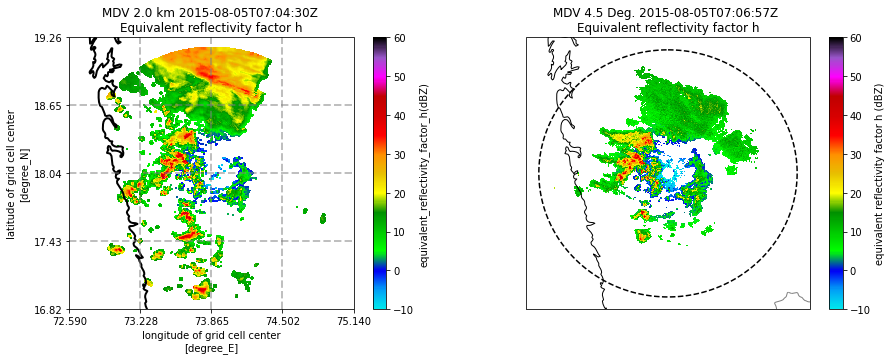